In [7]:
import warnings
from sklearn import cluster as c
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

In [8]:
warnings.filterwarnings('ignore')

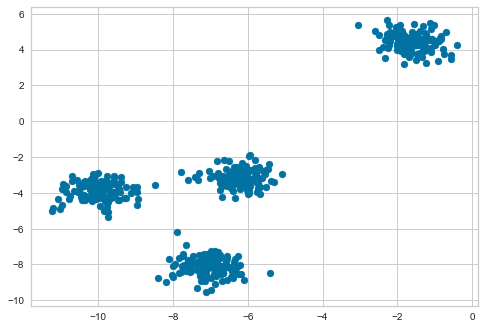

In [3]:
# dataset
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.5, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# plot dataset
plt.scatter(X[:,0], X[:,1]);

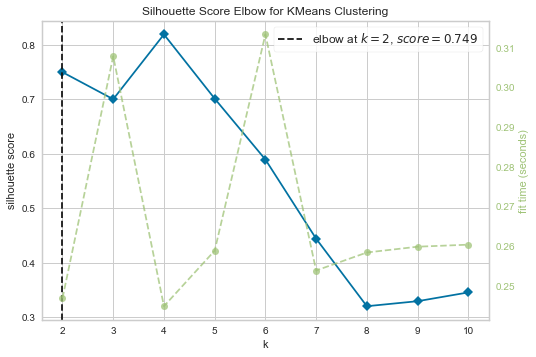

In [10]:
# modeling
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette')
kmeans.fit(X)
kmeans.show();

# Silhouette Analysys

IndexError: index 2 is out of bounds for axis 0 with size 2

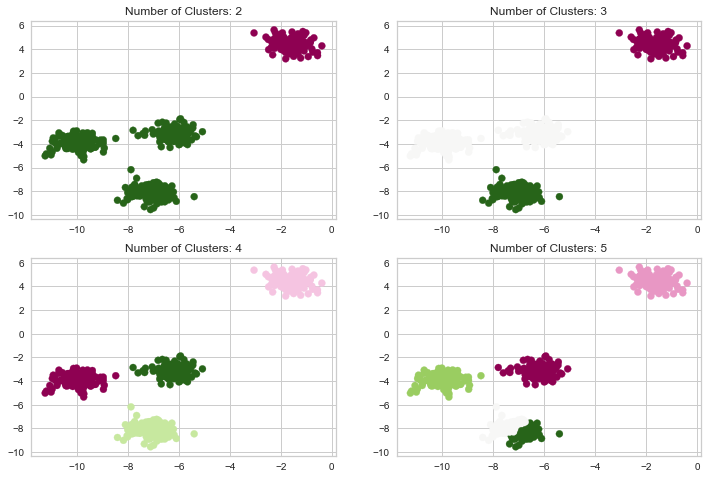

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++', n_init=10)
    kmeans.fit(X)

    q, mod = divmod(i, 2)
    ax[q-1, mod].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=plt.cm.PiYG)
    ax[q-1, mod].set_title(f'Number of Clusters: {i}')

IndexError: index 2 is out of bounds for axis 0 with size 2

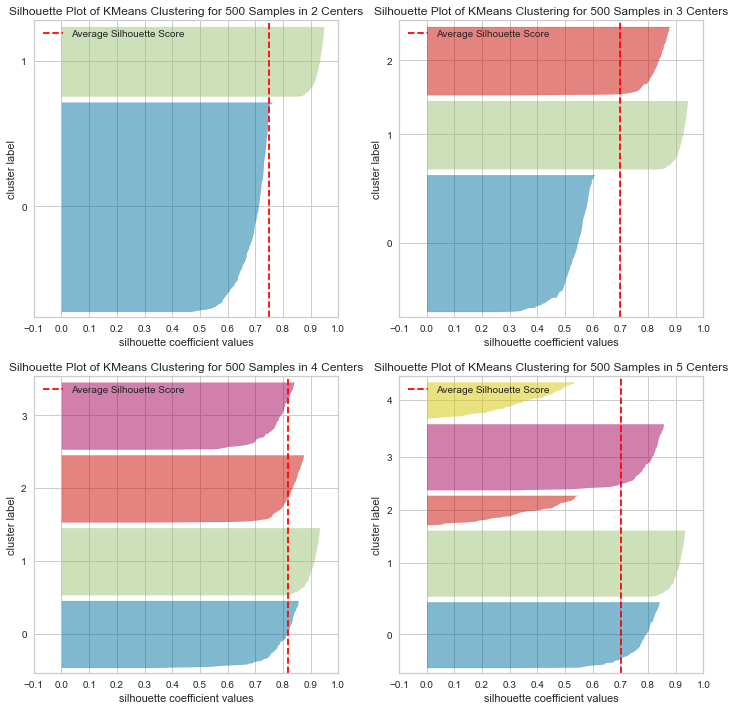

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for i in clusters:
    kmeans = c.KMeans(n_clusters=i, init='k-means++', n_init=10)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1, mod])
    visualizer.fit(X)
    visualizer.finalize();